代码：https://github.com/guoday/Tencent2019_Preliminary_Rank1st
博客：https://zhuanlan.zhihu.com/p/85520936

## 比赛内容
### 结构化数据
[腾讯广告大赛](https://algo.qq.com/index.html)

[天池-智联人岗匹配](https://tianchi.aliyun.com/competition/entrance/231728/introduction?spm=5176.12281957.1004.15.37663eafoPPcMe)

[天池-口碑商家流量预估](https://tianchi.aliyun.com/competition/entrance/231591/information)

[数据科学比赛获奖方案合集](https://github.com/Smilexuhc/Data-Competition-TopSolution)


### 非结构化数据
图像/语音/NLP/GAN。。。

## 结构化数据比赛套路
- 数据类型：行为流水/静态属性
- 预处理：数据读取/解析
- 特征提取：统计/序列/id-Embedding
- 模型训练/预测
- 模型融合
- 提交预测结果

## 腾讯2019广告大赛赛题解读

- 训练数据：广告曝光日志/用户&广告静态属性/广告操作记录
- 预测目标：广告曝光值
- 评估指标：曝光值与真实值的差距&出价单调性

## 代码解读

### 预处理
- 序列化
- 清理内存
- 进度条

In [ ]:
import os
import pandas as pd
import numpy as np
import random
import gc
import time
from tqdm import tqdm

In [ ]:
# pandas读取数据
df=pd.read_csv('data/testA/totalExposureLog.out', sep='\t',names=['id','request_timestamp','position','uid','aid','imp_ad_size','bid','pctr','quality_ecpm','totalEcpm']).sort_values(by='request_timestamp')
# 数据类型转换
df[['id','request_timestamp','position','uid','aid','imp_ad_size']]=df[['id','request_timestamp','position','uid','aid','imp_ad_size']].astype(int)
df[['bid','pctr','quality_ecpm','totalEcpm']]=df[['bid','pctr','quality_ecpm','totalEcpm']].astype(float) 
# 序列化，加快读取速度
df.to_pickle('data/testA/totalExposureLog.pkl') 
# 清理内存
del df
gc.collect()

In [ ]:
# tqdm显示进度条
for x in tqdm(train_df['request_timestamp'].values,total=len(train_df)):
    localtime=time.localtime(x)
    wday.append(localtime[6])
    hour.append(localtime[3])
    minute.append(localtime[4])

In [ ]:
# totalExposureLog 曝光日志：每一次曝光的id，广告属性，广告出价等
df[['id','request_timestamp','position','uid','aid','imp_ad_size','bid','pctr','quality_ecpm','totalEcpm']]
# ad_static_feature 广告静态属性
df[['aid','create_timestamp','advertiser','good_id','good_type','ad_type_id','ad_size']]
# user_data 用户属性
df[['uid','age','gender','area','status','education','concuptionAbility','os','work','connectionType','behavior']]
# test_sample测试数据，目的是预测曝光数
df[['id','aid','create_timestamp','ad_size','ad_type_id','good_type','good_id','advertiser','delivery_periods','crowd_direction','bid']]
# ad_operation 广告操作数据，表示某一个广告在某一天对某个人群设定了某个投放时间段
df[['aid','request_day','crowd_direction','delivery_periods']]

###  特征提取
#### 静态特征join

In [ ]:
log=log.merge(df,on='aid',how='left')

解析人群定向信息/广告投放时段信息

split/循环/list/dict

#### 序列特征：取top100个item

In [ ]:
from collections import Counter
counter = Counter({'a':1,'b':2,'c':4})
item=[str(x[0]) for x in counter.most_common(k)]

#### 历史特征
用前一天的特征（统计）值

#### kfold特征

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
X = np.arange(24).reshape(12,2)
y = np.random.choice([1,2],12,p=[0.4,0.6])
folds = KFold(n_splits=5,shuffle=True, random_state=2019)

In [ ]:
for fold_,(trn_idx,val_idx) in enumerate(folds.split(X,X)):
    print(fold_, (trn_idx,val_idx)  )

In [ ]:
folds = KFold(n_splits=5, shuffle=True, random_state=2019)

data['fold'] = None
for fold_,(trn_idx,val_idx) in enumerate(folds.split(data,data)):
    data.loc[val_idx, 'fold'] = fold_

kfold_features = []
for feat in ['aid','goods_id','account_id','aid_size','industry_id','goods_type']:

    nums_columns = ['pctr','quality_ecpm','totalEcpm','cpc','ecpm']

    for f in nums_columns:
        colname = feat + '_' + f + '_kfold_mean'
        print(colname)
        kfold_features.append(colname)
        data[colname] = None 
        for fold_,(trn_idx,val_idx) in enumerate(folds.split(dataLog,dataLog)):
            Log_trn     = dataLog.iloc[trn_idx]
            order_label = Log_trn.groupby([feat])[f].mean() 
            tmp         = data.loc[data.fold==fold_,[feat]]
            data.loc[data.fold==fold_, colname] = tmp[feat].map(order_label)
            # fillna
            median      = Log_trn[f].median()
            data.loc[data.fold==fold_, colname] = data.loc[data.fold==fold_, colname].fillna(median) 

    for f in nums_columns:
        colname       = feat + '_' + f + '_kfold_mean'
        test[colname] = None
        order_label   = dataLog.groupby([feat])[f].mean()
        test[colname] = test[feat].map(order_label)
        # fillna
        median        = dataLog[f].median()
        test[colname] = test[colname].fillna(median)

#### 统计特征

In [ ]:
tmp = pd.DataFrame(data.groupby(f1)[f2].count()).reset_index()

#### ID-embedding
##### 为什么
- ID类特征比大小无意义，不能直接用一维输入
- onehot空间大，只有记忆性，不具有泛化性，没法比较相似度
- embedding降维成dense vector，使得每一维有hidden的含义，可以比较相似度

##### 怎么做
- 每个用户点过哪些广告
- 每个广告被哪些用户点击过
- sentence是list套list
- word2vec/deepwalk/graph embedding

In [ ]:
import gensim
model = Word2Vec(sentence, size=L, window=10, min_count=1, workers=10,iter=10)

deepwalk是先随机采样序列，再word2vec

In [ ]:
def deepwalk(log,f1,f2,flag,L):
    #Deepwalk算法，
    print("deepwalk:",f1,f2)
    #构建图
    dic={}
    for item in log[[f1,f2]].values:
        try:
            str(int(item[1]))
            str(int(item[0]))
        except:
            continue
        try:
            dic['item_'+str(int(item[1]))].add('user_'+str(int(item[0])))
        except:
            dic['item_'+str(int(item[1]))]=set(['user_'+str(int(item[0]))])
        try:
            dic['user_'+str(int(item[0]))].add('item_'+str(int(item[1])))
        except:
            dic['user_'+str(int(item[0]))]=set(['item_'+str(int(item[1]))])
    dic_cont={}
    for key in dic:
        dic[key]=list(dic[key])
        dic_cont[key]=len(dic[key])
    print("creating")     
    #构建路径
    path_length=10        
    sentences=[]
    length=[]
    for key in dic:
        sentence=[key]
        while len(sentence)!=path_length:
            key=dic[sentence[-1]][random.randint(0,dic_cont[sentence[-1]]-1)]
            if len(sentence)>=2 and key == sentence[-2]:
                break
            else:
                sentence.append(key)
        sentences.append(sentence)
        length.append(len(sentence))
        if len(sentences)%100000==0:
            print(len(sentences))
    print(np.mean(length))
    print(len(sentences))
    #训练Deepwalk模型
    print('training...')
    random.shuffle(sentences)
    model = Word2Vec(sentences, size=L, window=4,min_count=1,sg=1, workers=10,iter=20)
    print('outputing...')

### 后处理

挡住5%的embedding向量，假装不知道，增强鲁棒性

类似做法还有向数据中加噪声

In [ ]:
for file,temp in train:
    print(file,temp.shape)
    print("w2v")
    for pivot,f,L in [('uid','aid',64),('uid','good_id',64),('uid','advertiser',64)]:
        df = pd.read_pickle('data/' +pivot+'_'+ f +'_'+flag +'_w2v_'+str(L)+'.pkl')                                 
        if 'train' in file:
            items=[]
            for item in temp[f].values:
                if random.random()<0.05:
                    items.append(-11111111111) # 给一个没有出现过的ID
                else:
                    items.append(item)
            temp['tmp']=items
            df['tmp']=df[f]
            del df[f]
            temp = pd.merge(temp, df, on='tmp', how='left') # left join结果为空
        else:
            temp = pd.merge(temp, df, on=f, how='left')
        print(temp.shape)

# 把空填0
temp=temp.fillna(0)           

### 模型训练

#### 浮点数Embedding [kv-memory embedding](https://zhuanlan.zhihu.com/p/85520936)

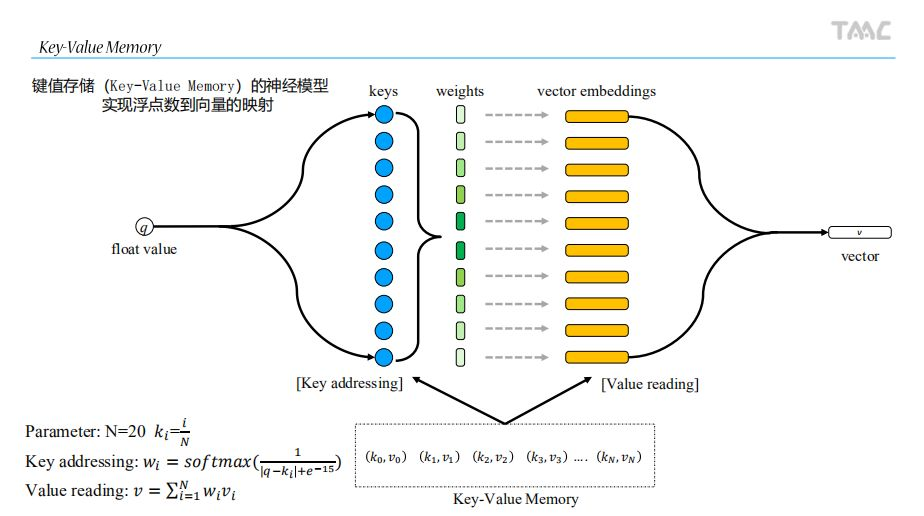
该段代码首先通过index将浮点数的区间（0~1）划分为N=20个子区间，每一个代表一个键值进行索引，然后计算每个样本的每个特征值与这20个区间的距离。这里需要注意的是weights已经增加了一个维度，每个kv_features都计算了与21个键值index的距离，然后每一个权重值与kv_emb_v2嵌入式特征矩阵相乘累加，reshape后得对最终的特征矩阵kv_emb，这里面的维度很容易出错，最终每个kv特征被嵌入式到hparams.k=16的向量空间中。

In [ ]:
if hparams.kv_features is not None:
    index=[i/hparams.kv_batch_num for i in range(hparams.kv_batch_num+1)]
    index=tf.constant(index)
    distance=1/(tf.abs(self.kv_features[:,:,None]-index[None,None,:])+0.00001)
    weights=tf.nn.softmax(distance,-1) #[batch_size,kv_features_size,kv_batch_num]
    kv_emb=tf.reduce_sum(weights[:,:,:,None]*kv_emb_v2[None,:,:,:],-2)
    kv_emb=tf.reshape(kv_emb,[-1,len(hparams.kv_features)*hparams.k])
    dnn_input.append(kv_emb)   

**NOTE**

训练好向量直接加入模型，和把embedding当做模型参数学习是两种操作方式

#### CIN
LR->FM->DeepFM->DCN->CIN

也叫xdeepFM你以为是DeepFM升级版其实是DeepCrossNetwork升级版超级无敌深度特征一顿交叉再交叉叉到你懵逼一种计算量极大的极深因子分解机模型

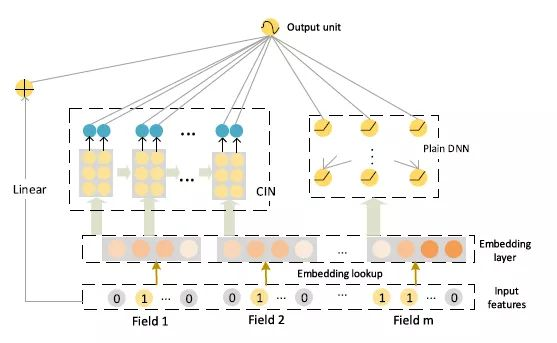

### 融合/产出结果

- 回归问题取log再训练，[参考资料](https://stats.stackexchange.com/questions/18844/when-and-why-should-you-take-the-log-of-a-distribution-of-numbers)
- 多次预测取平均值

In [ ]:
for i in range(5):
    print("Fold",i)
    dev_index=K_fold[i]
    train_index=[]
    for j in range(5):
        if j!=i:
            train_index+=K_fold[j]
    for k in range(2):
        model=ctrNet.build_model(hparam)
        score=model.train(train.loc[train_index],train.loc[dev_index])
        scores.append(score)
        train_preds[list(dev_index)]+=model.infer(train.loc[list(dev_index)])/2
        test_preds+=model.infer(test)/10
        print(np.mean((np.exp(test_preds*10/(i*2+k+1))-1)))
    try:
        del model
        gc.collect()
    except:
        pass
train_preds=np.exp(train_preds)-1
test_preds=np.exp(test_preds)-1